<h1>Data Preprocessing Of House Price Prediction Dataset<h1>

<h2>1. We need to import the libraries</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


<h2>2. Understanding and Loading the Data</h2>


<h3 >2.1. Loading the data</h3>

In [2]:
df = pd.read_csv('kc_house_data.csv')

<h3>2.2. Inspect the Data:</h3>

In [3]:
print("the shape of data :", df.shape)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

the shape of data : (21613, 21)
Number of instances = 21613
Number of attributes = 21


In [4]:


# df['total_sqft'] = df['sqft_above'] + df['sqft_basement']

# df['quality_area'] = df['grade'] * df['total_sqft']


# # Display the shape of the updated data
# print("The shape of the data after feature engineering:", df.shape)
# print('Number of instances = %d' % (df.shape[0]))
# print('Number of attributes = %d' % (df.shape[1]))



# # Display the first few rows to check the new features
# print(df[['sqft_above', 'sqft_basement', 'total_sqft','grade','quality_area']].head())



<p> Feature engineering , we tried adding new features based on the provided features but no added value.</p>

<p>- Taking a look at the head of dataset</p>

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


<p>- Determining columns information like their types :</p>


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

</p>- Convert the 'date' column to a datetime format </p>


In [7]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Display the first few rows to verify the changes
print(df['date'].head())

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]


<p>We dropped Date and id columns to avoid overfitting, because keeping them made the R score low</p>

In [8]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['date'], inplace=True)


<p>- Describing the dataset</p>


In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<p>- Checking duplicated rows</p>

In [10]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 5


<p>- Checking missing values</p>

In [11]:
print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))

Number of missing values:
	price: 0
	bedrooms: 0
	bathrooms: 0
	sqft_living: 0
	sqft_lot: 0
	floors: 0
	waterfront: 0
	view: 0
	condition: 0
	grade: 0
	sqft_above: 0
	sqft_basement: 0
	yr_built: 0
	yr_renovated: 0
	zipcode: 0
	lat: 0
	long: 0
	sqft_living15: 0
	sqft_lot15: 0


<h3>Ploting the heatmap</h3>

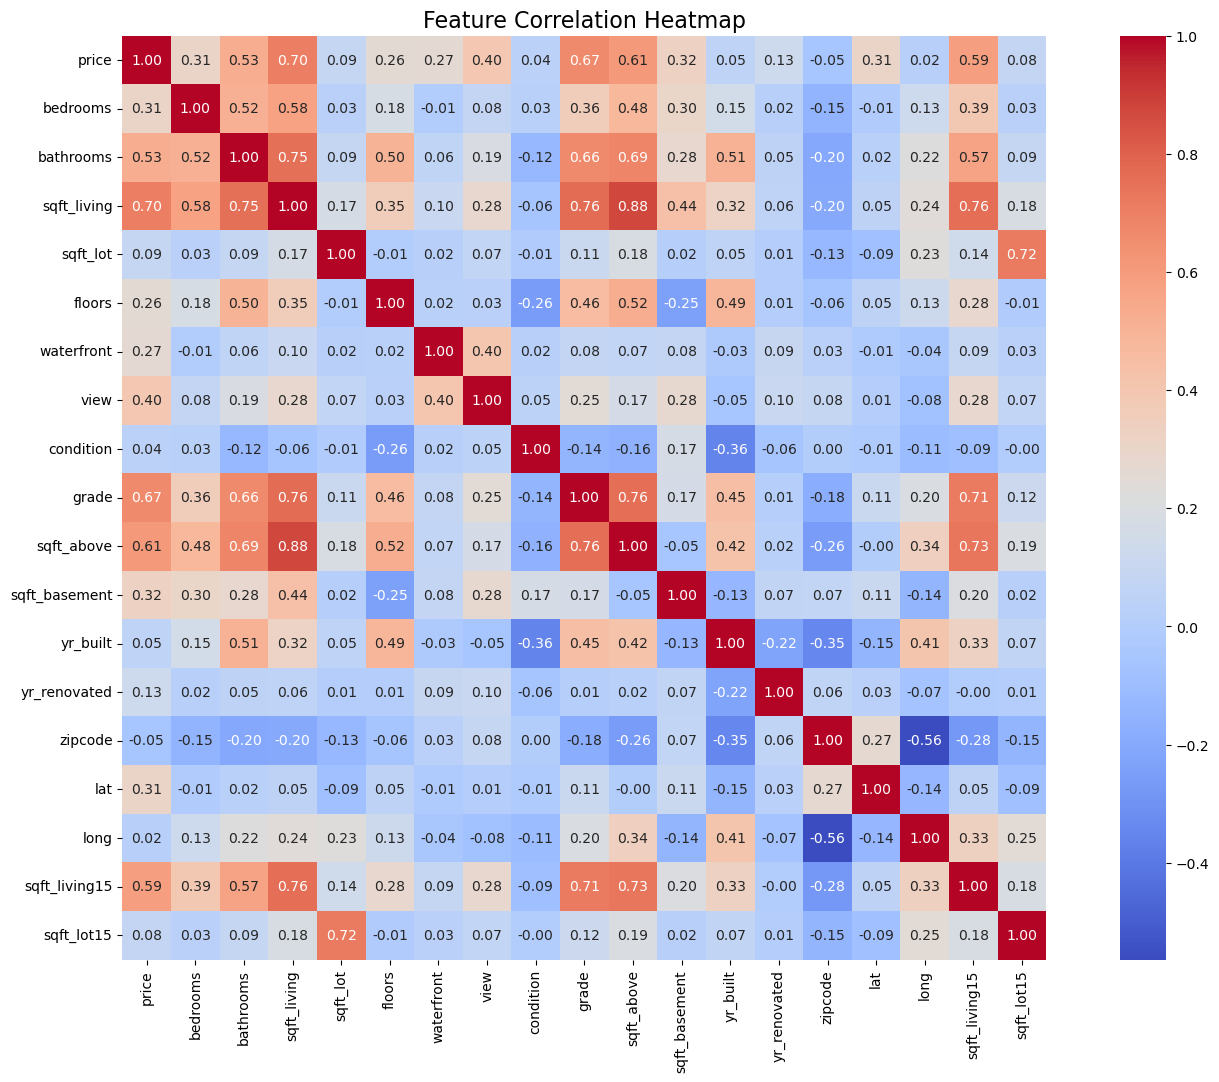

In [12]:
correlation_matrix = df.corr()

plt.figure(figsize=(19, 12))

sns.heatmap(correlation_matrix, 
            annot=True,           # Annotate each cell with the correlation value
            fmt=".2f",            # Format to 2 decimal places
            cmap="coolwarm",      # Colormap
            cbar=True,            # Show color bar
            square=True)          # Make the cells square

plt.title("Feature Correlation Heatmap", fontsize=16)

plt.show()

### Heatmap Interpretation
- **Strong correlations with price**: `sqft_living`, `grade`, `sqft_above`.
- **Weak correlations with price**: `zipcode`, `lat`, `long`.
- **Multicollinearity observed**: Between `sqft_living` and `sqft_above`.

<p>- Plot histograms for each feature in the DataFrame.</p>

In [13]:
def plot_feature_histograms(df):

    # Exclude the target column
    features = [col for col in df.columns ]
    
    # Calculate grid size
    num_features = len(features)
    grid_size = math.ceil(math.sqrt(num_features))  # Determine grid dimensions (square grid)
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(16, 16))
    axes = axes.flatten()  
    
    for i, col in enumerate(features):
        ax = axes[i]
        ax.hist(df[col], bins=30, color='blue', alpha=0.7)
        ax.set_title(f"Histogram of {col}", fontsize=10)
        ax.set_xlabel(col, fontsize=9)
        ax.set_ylabel("Frequency", fontsize=9)
        ax.grid(True, linestyle="--", alpha=0.5)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

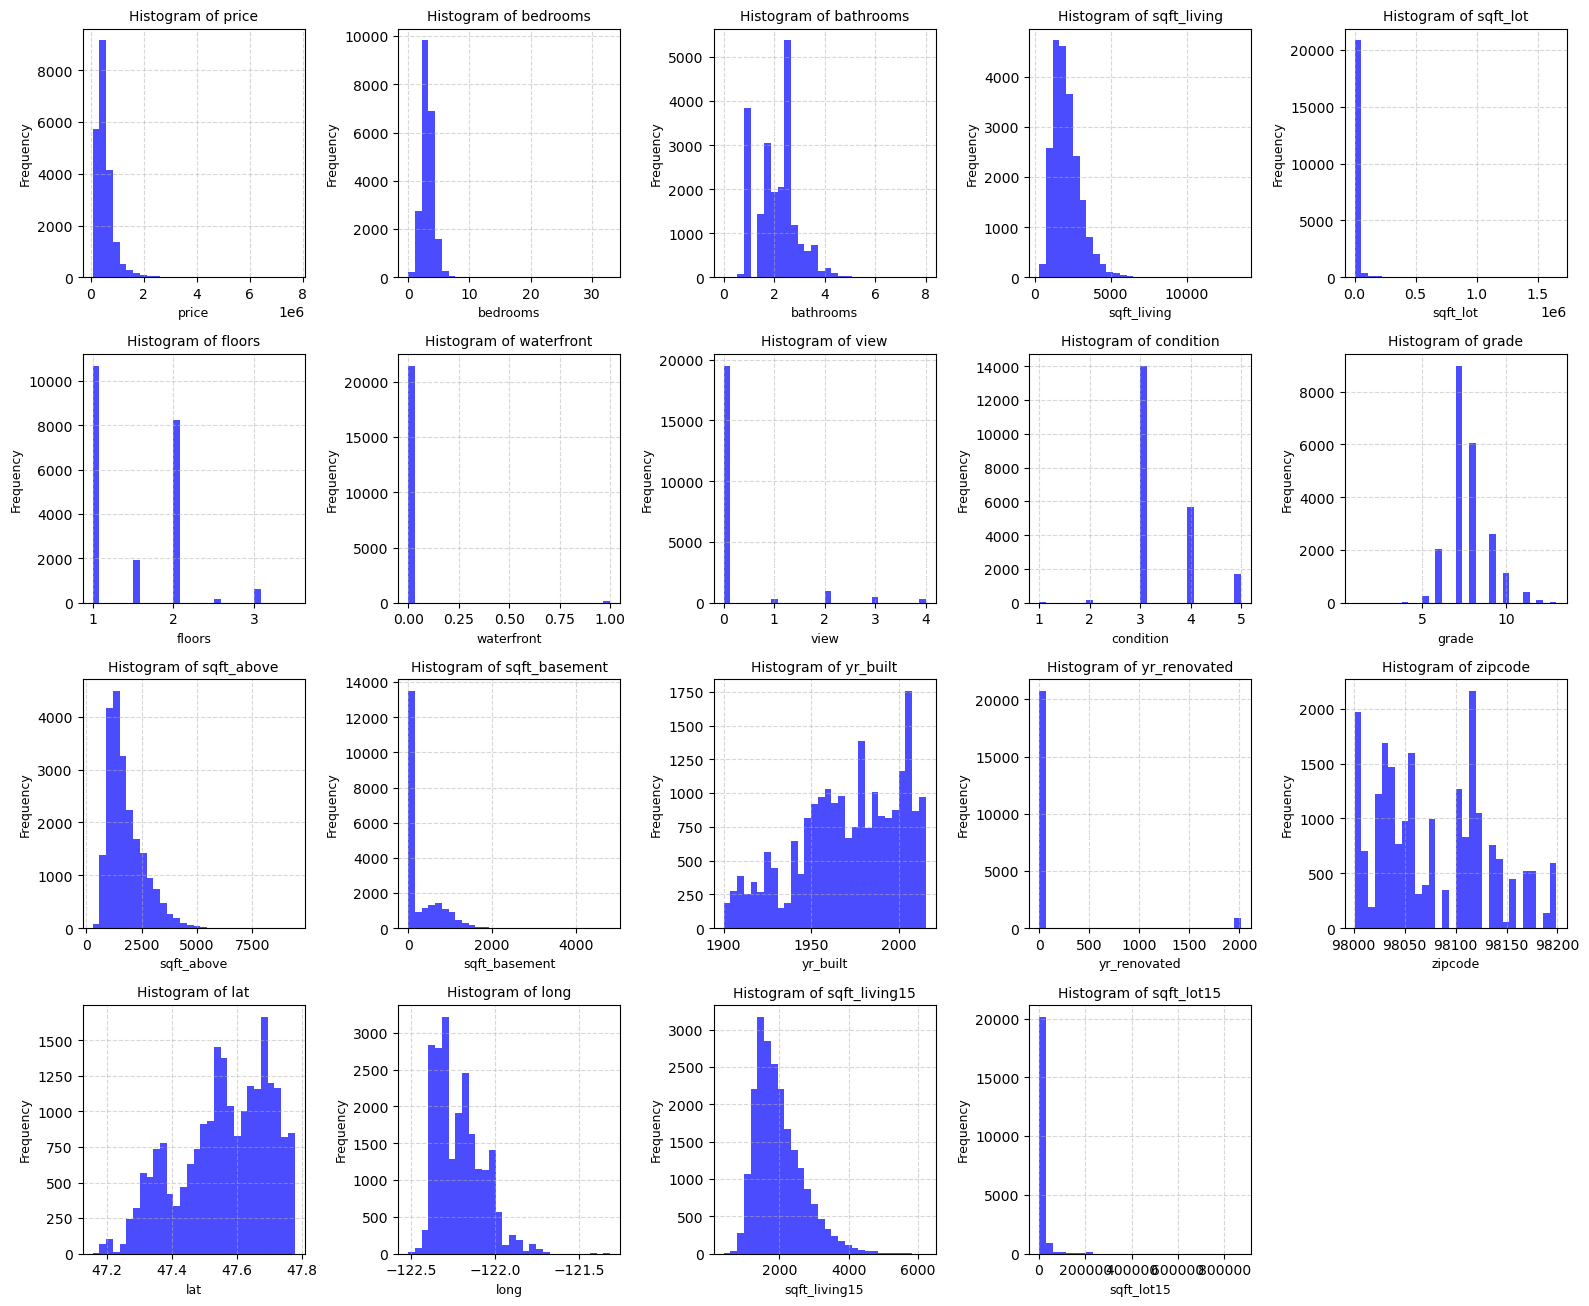

In [14]:
plot_feature_histograms(df)

### Histogram Interpretation
- **Right-skewed distributions**: Features like `price`, `sqft_living`, `sqft_lot`, `sqft_above`, `sqft_basement`, and `sqft_living15` are heavily right-skewed, indicating **outliers**.

- **Categorical distributions**: Features such as `floors`, `waterfront`, `view`, `condition`, and `grade` are mostly discrete, with clear peaks at specific values.

- **Year-related features**:  
  - `yr_built` is well-distributed across time, while `yr_renovated` is mostly zero, showing that **most properties were not renovated**.  

- **Geographical features**: `lat` and `long` are roughly **normally distributed**, reflecting the spread of properties across locations.  

- **Frequency Scaling Issues**:  
  - The histograms reveal that **feature frequencies vary significantly**:
    - Some features peak around **20,000** (`zipcode`),  
    - Others around **8,000** (`price`, `sqft_living`),  
    - While some are capped at just **1,500** (`waterfront`, `view`).  
  - This indicates the need for **scaling techniques** (like **Min-Max Scaling** or **Standardization**) to **normalize the range** and improve model convergence.

This analysis highlights the necessity for **scaling**, **outlier handling**, and **feature normalization** for better model training.


<p>- Plot box plots for each feature in the DataFrame, excluding the date column.</p>


In [15]:
def plot_feature_boxplots(df):

    features = [col for col in df.columns if col != 'date' ]
    
    num_features = len(features)
    grid_size = math.ceil(math.sqrt(num_features))  # Determine grid dimensions (square grid)
    
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(16, 16))
    axes = axes.flatten()  # Flatten axes for easy indexing
    
    for i, col in enumerate(features):
        ax = axes[i]
        ax.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.7))
        ax.set_title(f"Box Plot of {col}", fontsize=10)
        ax.set_xlabel(col, fontsize=9)
        ax.grid(True, linestyle="--", alpha=0.5)
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

<h3>4. Splitting the Data And Training the Model</h3>


<h3>4.1. Splitting the data</h3>

In [16]:
X = df.drop(['price'], axis=1) 
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (17290, 18)
X_test shape: (4323, 18)
y_train shape: (17290,)
y_test shape: (4323,)


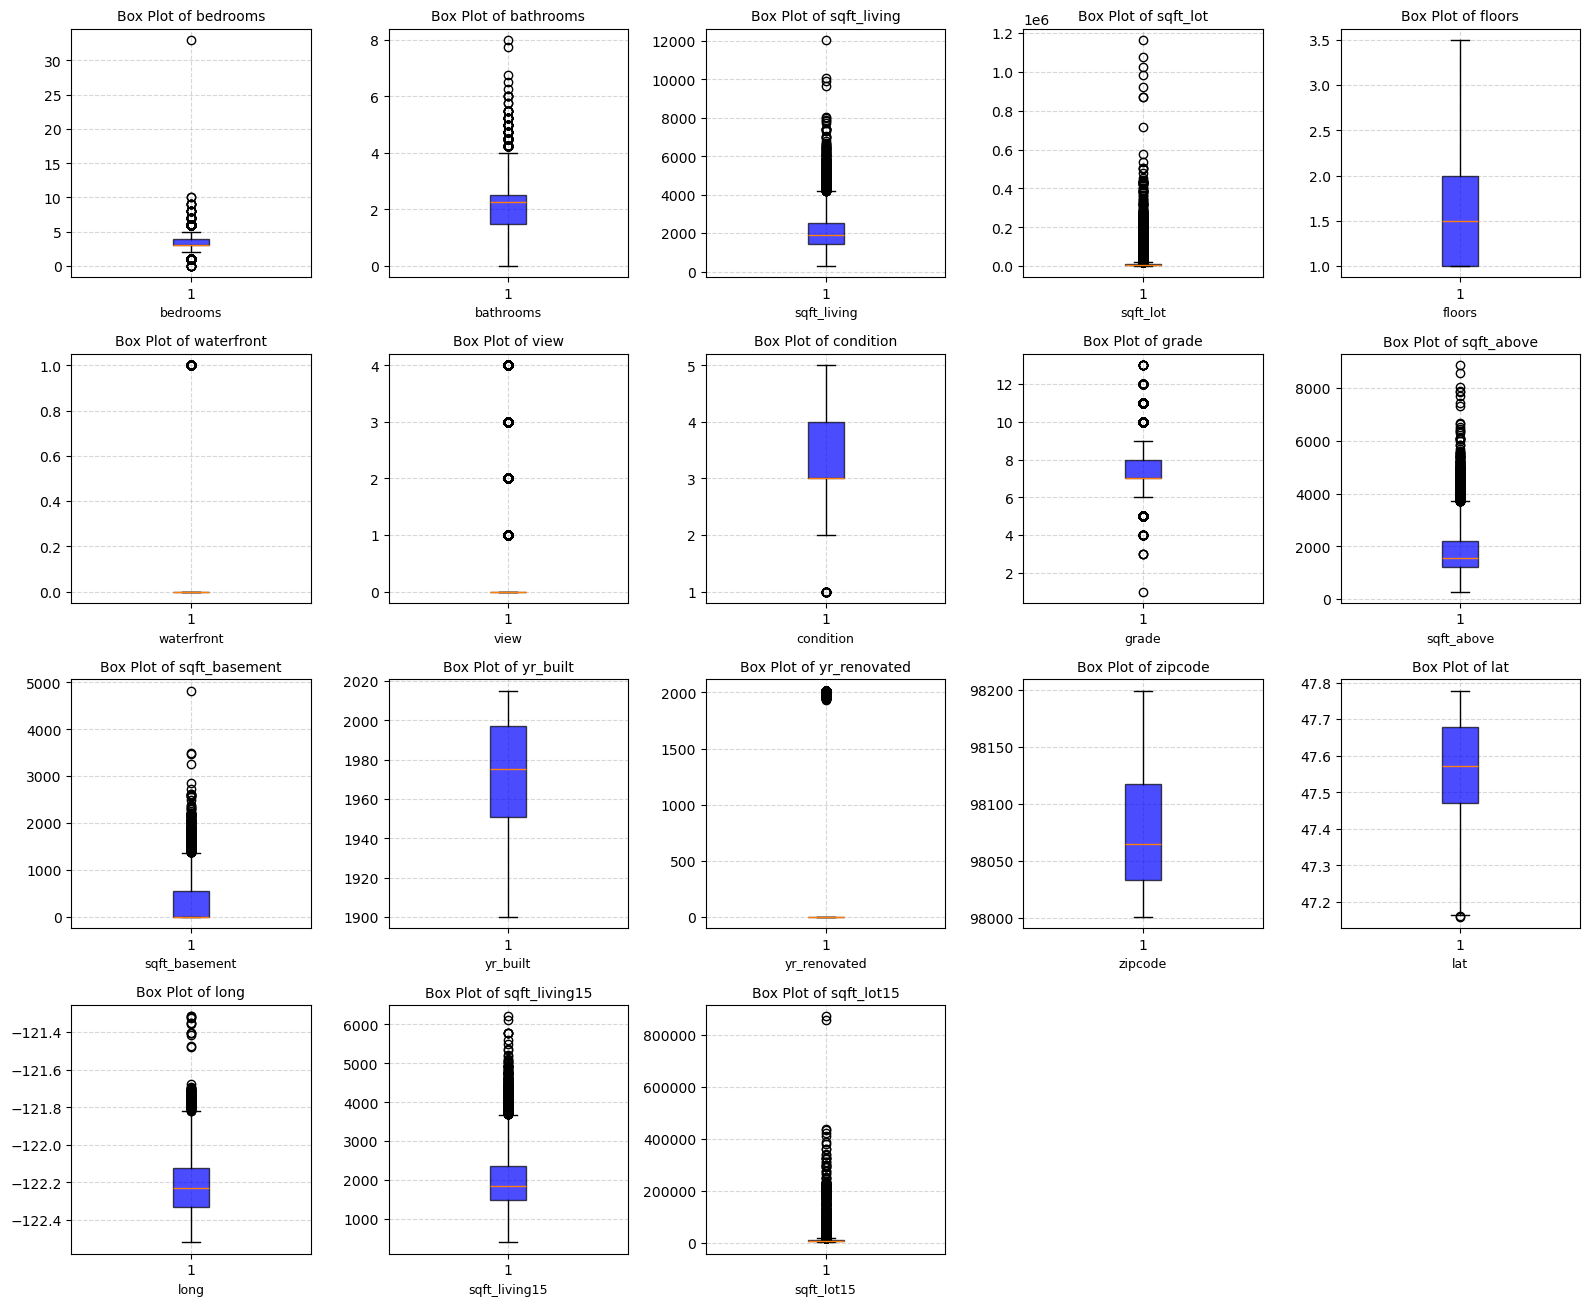

In [17]:
plot_feature_boxplots(X_train)

<p>I commented this code , because removing the outliers didn't improve the model</p>

In [18]:
# def remove_outliers(X_train, y_train):
#     # Concatenate X_train and y_train to maintain pairing
#     df = X_train.copy()
#     df['target'] = y_train.values  # Ensure y_train has the correct shape

#     # Iterate over numerical columns to detect and remove outliers
#     for col in df.select_dtypes(include=['float64', 'int64']).columns:
#         if col == 'target':
#             continue  # Skip the target column
        
#         Q1 = df[col].quantile(0.25)
#         Q3 = df[col].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         # Filter out rows with outliers
#         df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

#     # Separate the cleaned features and target variable
#     X_train_cleaned = df.drop('target', axis=1)
#     y_train_cleaned = df['target']

#     return X_train_cleaned, y_train_cleaned


In [19]:


# # Remove outliers from X_train and y_train
# X_train, y_train = remove_outliers(X_train, y_train)

# print(f"Cleaned X_train shape: {X_train.shape}")
# print(f"Cleaned y_train shape: {y_train.shape}")

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data, and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaling completed.")

X_train = X_train_scaled
X_test = X_test_scaled

Data scaling completed.


In [21]:
# plot_feature_boxplots(pd.DataFrame(X_train))

<h3>Decision Tree</h3>

In [23]:
model = DecisionTreeRegressor(max_depth=5, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 48815832503.33553
Mean Absolute Error: 121978.78965770283
R^2 Score: 0.6770942311511904


<h3>Random forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest Mean Absolute Error: {rf_mae}")
print(f"Random Forest R^2 Score: {rf_r2}")

<h3>KNN</h3>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_mae = mean_absolute_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f"KNN Mean Squared Error: {knn_mse}")
print(f"KNN Mean Absolute Error: {knn_mae}")
print(f"KNN R^2 Score: {knn_r2}")

KNN Mean Squared Error: 31342931716.238586
KNN Mean Absolute Error: 89347.13795975018
KNN R^2 Score: 0.7926735457575937


<h3>Naive Bayes</h3>

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions
nb_y_pred = nb_model.predict(X_test)

# Evaluate the model
nb_mse = mean_squared_error(y_test, nb_y_pred)
nb_mae = mean_absolute_error(y_test, nb_y_pred)
nb_r2 = r2_score(y_test, nb_y_pred)

print(f"Naïve Bayes Mean Squared Error: {nb_mse}")
print(f"Naïve Bayes Mean Absolute Error: {nb_mae}")
print(f"Naïve Bayes R^2 Score: {nb_r2}")

Naïve Bayes Mean Squared Error: 66330172327.031456
Naïve Bayes Mean Absolute Error: 160283.82442748093
Naïve Bayes R^2 Score: 0.5612408066241494


<h3>SVR</h3>

In [ ]:
from sklearn.svm import SVR

# Support Vector Machine (SVM) Regressor
svm_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svm_model.fit(X_train, y_train)
svm_y_pred = svm_model.predict(X_test)

svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_mae = mean_absolute_error(y_test, svm_y_pred)
svm_r2 = r2_score(y_test, svm_y_pred)

print(f"SVM Mean Squared Error: {svm_mse}")
print(f"SVM Mean Absolute Error: {svm_mae}")
print(f"SVM R^2 Score: {svm_r2}")

<h3>ANN</h3>

In [ ]:
from sklearn.neural_network import MLPRegressor

# Artificial Neural Networks (ANN) Regressor
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)
ann_y_pred = ann_model.predict(X_test)

ann_mse = mean_squared_error(y_test, ann_y_pred)
ann_mae = mean_absolute_error(y_test, ann_y_pred)
ann_r2 = r2_score(y_test, ann_y_pred)

print(f"ANN Mean Squared Error: {ann_mse}")
print(f"ANN Mean Absolute Error: {ann_mae}")
print(f"ANN R^2 Score: {ann_r2}")

ANN Mean Squared Error: 37544518158.77105
ANN Mean Absolute Error: 115024.13449899488
ANN R^2 Score: 0.7516514442053674


c:\Users\denta\anaconda3\envs\DM_ENV\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


<h3>Linear regression</h3>

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"Linear Regression Mean Squared Error: {lr_mse}")
print(f"Linear Regression Mean Absolute Error: {lr_mae}")
print(f"Linear Regression R^2 Score: {lr_r2}")

Linear Regression Mean Squared Error: 45173046132.79009
Linear Regression Mean Absolute Error: 127493.34208656946
Linear Regression R^2 Score: 0.7011904448878417


<h2>Other models</h2>

<h3>XGBoost</h3>

In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the model
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost Mean Squared Error: {xgb_mse}")
print(f"XGBoost Mean Absolute Error: {xgb_mae}")
print(f"XGBoost R^2 Score: {xgb_r2}")

XGBoost Mean Squared Error: 19116655745.126137
XGBoost Mean Absolute Error: 72135.88488535161
XGBoost R^2 Score: 0.873547615504126


<h3>Light GBM</h3>

In [ ]:
from lightgbm import LGBMRegressor

# Initialize the LightGBM Regressor
lgbm_model = LGBMRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)

# Train the model
lgbm_model.fit(X_train, y_train)

# Make predictions
lgbm_y_pred = lgbm_model.predict(X_test)

# Evaluate the model
lgbm_mse = mean_squared_error(y_test, lgbm_y_pred)
lgbm_mae = mean_absolute_error(y_test, lgbm_y_pred)
lgbm_r2 = r2_score(y_test, lgbm_y_pred)

print(f"LightGBM Mean Squared Error: {lgbm_mse}")
print(f"LightGBM Mean Absolute Error: {lgbm_mae}")
print(f"LightGBM R^2 Score: {lgbm_r2}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2327
[LightGBM] [Info] Number of data points in the train set: 17290, number of used features: 18
[LightGBM] [Info] Start training from score 537768.047947
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

<h3>Tensor flow ANN</h3>

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
tf_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
tf_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = tf_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
tf_loss, tf_mae = tf_model.evaluate(X_test, y_test, verbose=0)
print(f"TensorFlow Neural Network Mean Absolute Error: {tf_mae}")

# Make predictions
tf_y_pred = tf_model.predict(X_test)

c:\Users\denta\anaconda3\envs\DM_ENV\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 432721100800.0000 - mae: 539155.5000 - val_loss: 386377973760.0000 - val_mae: 524352.3125
Epoch 2/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 400612425728.0000 - mae: 516640.6562 - val_loss: 311958339584.0000 - val_mae: 453030.3125
Epoch 3/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 311804002304.0000 - mae: 424058.9375 - val_loss: 187325251584.0000 - val_mae: 301824.1250
Epoch 4/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 180752695296.0000 - mae: 265578.6250 - val_loss: 101941731328.0000 - val_mae: 189490.4844
Epoch 5/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 120601411584.0000 - mae: 189507.1094 - val_loss: 81965907968.0000 - val_mae: 186944.6875
Epoch 6/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 106032906240.0000 - mae: 193853.5625 - val_loss: 79633440768.0000 - val_mae: 192379.0625
Epoch 7/50
433/433 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 99284451328.0000 - mae: 195423.2656 - val_

In [ ]:

xgb_mse = mean_squared_error(y_test, tf_y_pred)
xgb_mae = mean_absolute_error(y_test, tf_y_pred)
xgb_r2 = r2_score(y_test, tf_y_pred)

print(f"tenserflow ann Mean Squared Error: {xgb_mse}")
print(f"tenserflow ann Mean Absolute Error: {xgb_mae}")
print(f"tenserflow ann R^2 Score: {xgb_r2}")

tenserflow ann Mean Squared Error: 50630423527.38148
tenserflow ann Mean Absolute Error: 133618.06386607967
tenserflow ann R^2 Score: 0.6650911190517365
